In [163]:
import subprocess
import time

from matplotlib import pyplot as plt

In [191]:
TARGET_SCORE = 44


def benchmark_function(args, print_output=False):
    start = time.time()
    result = subprocess.run(f"/home/marcin/PJATK/SEM6/MHE/Nonogram/cpp/cmake-build-debug/Nonogram {args}", shell=True,
                            capture_output=True)
    end = time.time()

    score = int(result.returncode)
    execution_time = end - start
    if print_output:
        print(result.stdout.decode('utf-8'))
        print(f'\nScore: {score}')
        print(f"Execution time: {execution_time:.2f} seconds")
    return score, execution_time


def plot_results(results, x_axis):
    data_1 = [item[0] for item in results]
    data_2 = [item[1] for item in results]

    fig, ax1 = plt.subplots()

    ax1.set_ylabel('SCORE', color='red')
    ax1.plot(x_axis, data_1, color='red')
    ax1.tick_params(axis='y', labelcolor='red')

    ax2 = ax1.twinx()

    ax2.set_ylabel('TIME', color='blue')
    ax2.plot(x_axis, data_2, color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')

    plt.show()


def calculate_average(results):
    score_sum = 0
    time_sum = 0.0
    for item in results:
        score_sum += item[0]
        time_sum += item[1]

    score = score_sum / len(results)
    execution_time = time_sum / len(results)
    return score, execution_time


def statistical_test_function(arguments, number_to_multiply, label=""):
    big_results = []
    x_axis = []
    for multiplier in range(1, 11):
        results = []
        x_axis.append(number_to_multiply * multiplier)
        for attempt in range(50):
            results.append(benchmark_function(f"-print_result false {arguments} {number_to_multiply * multiplier}",
                                              print_output=False))
        avg_score, avg_execution_time = calculate_average(results)
        print(f"## {number_to_multiply * multiplier} {label} ###")
        print(f"avg score: {avg_score}")
        print(f"avg execution time: {avg_execution_time}\n")
        big_results.append((avg_score, avg_execution_time))
    plot_results(big_results, x_axis)
    big_avg_score, big_avg_execution_time = calculate_average(big_results)
    print(f"## Overall ###")
    print(f"avg score: {big_avg_score}")
    print(f"avg execution time: {big_avg_execution_time}")


def statistical_test_function_argument_list(arguments, params_list, label=""):
    big_results = []
    x_axis = []
    for param in params_list:
        results = []
        x_axis.append(param)
        for attempt in range(50):
            results.append(benchmark_function(f"-print_result false {arguments} {param}", print_output=False))
        avg_score, avg_execution_time = calculate_average(results)
        print(f"## {param} {label} ###")
        print(f"avg score: {avg_score}")
        print(f"avg execution time: {avg_execution_time}\n")
        big_results.append((avg_score, avg_execution_time))
    plot_results(big_results, x_axis)
    big_avg_score, big_avg_execution_time = calculate_average(big_results)
    print(f"## Overall ###")
    print(f"avg score: {big_avg_score}")
    print(f"avg execution time: {big_avg_execution_time}")


def run_algorithm_in_loop(arguments, attempts, label=""):
    results = []
    x_axis = []
    hits = 0
    for attempt in range(attempts):
        x_axis.append(attempt)
        score, execution_time = benchmark_function(f"-print_result true {arguments}", print_output=False)
        results.append((score, execution_time))
        if score == TARGET_SCORE:
            hits += 1

    avg_score, avg_execution_time = calculate_average(results)
    print(f"## {label} ###")
    print(f"Hits ratio: {hits / attempts * 100}%")
    print(f"Avg score: {avg_score}")
    print(f"Avg execution time: {avg_execution_time}\n")
    plot_results(results, x_axis)


## Hill Climbing Deterministic

## 100 iterations ###
avg score: 36.86
avg execution time: 0.032383885383605954

## 200 iterations ###
avg score: 37.18
avg execution time: 0.03984806537628174

## 300 iterations ###
avg score: 37.22
avg execution time: 0.0413478422164917

## 400 iterations ###
avg score: 37.04
avg execution time: 0.045218796730041505

## 500 iterations ###
avg score: 37.2
avg execution time: 0.057876238822937014

## 600 iterations ###
avg score: 37.7
avg execution time: 0.06285758018493652

## 700 iterations ###
avg score: 36.58
avg execution time: 0.06615003108978272

## 800 iterations ###
avg score: 37.96
avg execution time: 0.08211583137512207

## 900 iterations ###
avg score: 36.36
avg execution time: 0.07868826389312744

## 1000 iterations ###
avg score: 36.96
avg execution time: 0.09301146984100342



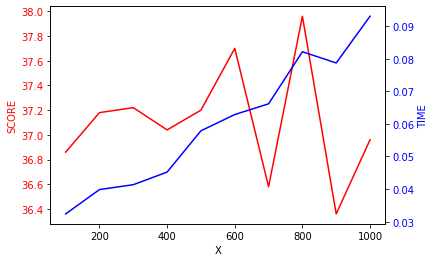

## Overall ###
avg score: 37.105999999999995
avg execution time: 0.05994980049133301


In [151]:
statistical_test_function("-method hillclimb_deterministic -iterations", 100, "iterations")

## Hill Climbing Stochastic

## 100 iterations ###
avg score: 34.86
avg execution time: 0.0399100399017334

## 200 iterations ###
avg score: 34.84
avg execution time: 0.05408906936645508

## 300 iterations ###
avg score: 34.88
avg execution time: 0.08589286804199218

## 400 iterations ###
avg score: 35.24
avg execution time: 0.09308399677276612

## 500 iterations ###
avg score: 35.54
avg execution time: 0.10502682685852051

## 600 iterations ###
avg score: 34.6
avg execution time: 0.1153093433380127

## 700 iterations ###
avg score: 34.58
avg execution time: 0.12203278064727784

## 800 iterations ###
avg score: 34.58
avg execution time: 0.13751303195953368

## 900 iterations ###
avg score: 35.46
avg execution time: 0.1566994571685791

## 1000 iterations ###
avg score: 34.86
avg execution time: 0.16679540634155274



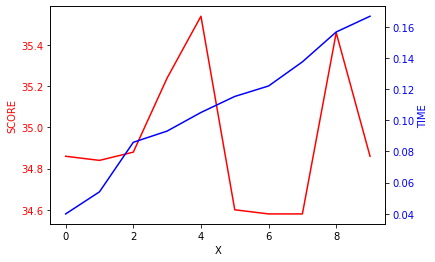

## Overall ###
avg score: 34.944
avg execution time: 0.10763528203964232


In [96]:
statistical_test_function("-method hillclimb_stochastic -iterations", 100, "iterations")

## Tabu - iterations

## 100 iterations ###
avg score: 38.1
avg execution time: 0.05866208076477051

## 200 iterations ###
avg score: 38.08
avg execution time: 0.07581889152526855

## 300 iterations ###
avg score: 38.7
avg execution time: 0.11009538650512696

## 400 iterations ###
avg score: 38.6
avg execution time: 0.12213386535644531

## 500 iterations ###
avg score: 38.6
avg execution time: 0.14640135765075685

## 600 iterations ###
avg score: 39.06
avg execution time: 0.17516444206237794

## 700 iterations ###
avg score: 37.68
avg execution time: 0.21015892028808594

## 800 iterations ###
avg score: 38.76
avg execution time: 0.2670020723342896

## 900 iterations ###
avg score: 38.14
avg execution time: 0.30489061832427977

## 1000 iterations ###
avg score: 38.06
avg execution time: 0.36530509471893313



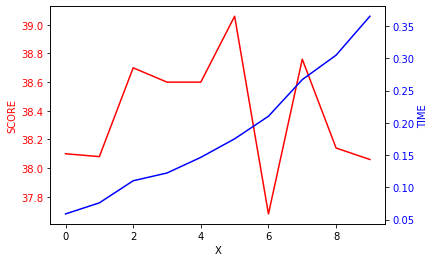

## Overall ###
avg score: 38.378
avg execution time: 0.18356327295303346


In [97]:
statistical_test_function("-method tabu -iterations", 100, "iterations")

## Tabu - list size

## 50 list size ###
avg score: 38.34
avg execution time: 0.0710997724533081

## 100 list size ###
avg score: 38.34
avg execution time: 0.08081449985504151

## 150 list size ###
avg score: 38.32
avg execution time: 0.07506679058074951

## 200 list size ###
avg score: 39.12
avg execution time: 0.07709342002868652

## 250 list size ###
avg score: 37.66
avg execution time: 0.08239925861358642

## 300 list size ###
avg score: 38.72
avg execution time: 0.0842038345336914

## 350 list size ###
avg score: 38.02
avg execution time: 0.07942514419555664

## 400 list size ###
avg score: 37.54
avg execution time: 0.07983304023742675

## 450 list size ###
avg score: 38.68
avg execution time: 0.08636361122131347

## 500 list size ###
avg score: 38.22
avg execution time: 0.08123355865478515



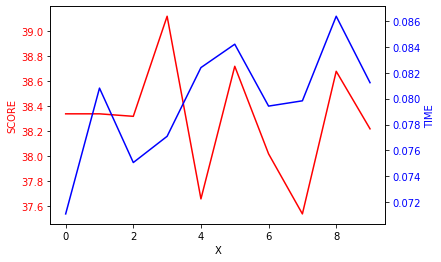

## Overall ###
avg score: 38.29600000000001
avg execution time: 0.07975329303741456


In [98]:
statistical_test_function("-method tabu -tabu_size", 50, "list size")

## Simulated Annealing - iterations

## 100 iterations ###
avg score: 23.38
avg execution time: 0.03142768383026123

## 200 iterations ###
avg score: 29.66
avg execution time: 0.05313116550445557

## 300 iterations ###
avg score: 41.4
avg execution time: 0.05596234321594238

## 400 iterations ###
avg score: 43.44
avg execution time: 0.0668224811553955

## 500 iterations ###
avg score: 43.76
avg execution time: 0.06544172763824463

## 600 iterations ###
avg score: 43.6
avg execution time: 0.06932580471038818

## 700 iterations ###
avg score: 43.68
avg execution time: 0.05807868003845215

## 800 iterations ###
avg score: 43.94
avg execution time: 0.08675815105438232

## 900 iterations ###
avg score: 43.94
avg execution time: 0.0702854585647583

## 1000 iterations ###
avg score: 43.92
avg execution time: 0.0787850046157837



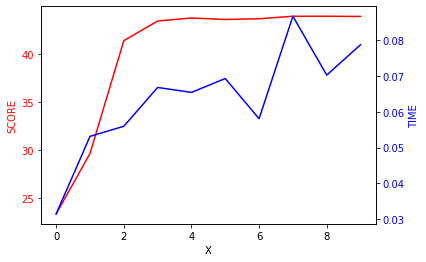

## Overall ###
avg score: 40.071999999999996
avg execution time: 0.06360185003280641


In [99]:
statistical_test_function("-method simulated_annealing -iterations", 100, "iterations")

## Simulated Annealing - initial temp

## 10 initial temp ###
avg score: 43.94
avg execution time: 0.0452460765838623

## 20 initial temp ###
avg score: 43.9
avg execution time: 0.05623148441314697

## 30 initial temp ###
avg score: 43.72
avg execution time: 0.05576408863067627

## 40 initial temp ###
avg score: 43.38
avg execution time: 0.06041857719421387

## 50 initial temp ###
avg score: 43.7
avg execution time: 0.06429902553558349

## 60 initial temp ###
avg score: 43.78
avg execution time: 0.06340770721435547

## 70 initial temp ###
avg score: 43.64
avg execution time: 0.0790387487411499

## 80 initial temp ###
avg score: 43.22
avg execution time: 0.11485607624053955

## 90 initial temp ###
avg score: 43.02
avg execution time: 0.09026017189025878

## 100 initial temp ###
avg score: 42.8
avg execution time: 0.06376092433929444



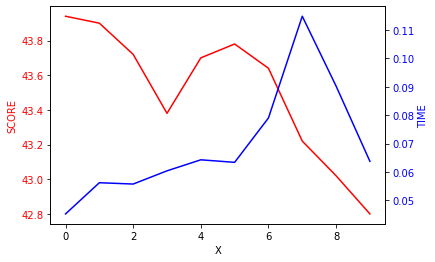

## Overall ###
avg score: 43.51
avg execution time: 0.06932828807830811


In [100]:
statistical_test_function("-method simulated_annealing -initial_temp", 10, "initial temp")

## Simulated Annealing - tries in epoque

## 5 tries in epoque ###
avg score: 43.08
avg execution time: 0.058241329193115234

## 10 tries in epoque ###
avg score: 43.5
avg execution time: 0.0724625825881958

## 15 tries in epoque ###
avg score: 43.94
avg execution time: 0.07160536289215087

## 20 tries in epoque ###
avg score: 43.7
avg execution time: 0.07254806995391845

## 25 tries in epoque ###
avg score: 43.82
avg execution time: 0.07413068771362305

## 30 tries in epoque ###
avg score: 43.94
avg execution time: 0.0662384033203125

## 35 tries in epoque ###
avg score: 43.66
avg execution time: 0.07494076251983643

## 40 tries in epoque ###
avg score: 43.86
avg execution time: 0.08183693885803223

## 45 tries in epoque ###
avg score: 44.0
avg execution time: 0.08635550975799561

## 50 tries in epoque ###
avg score: 43.94
avg execution time: 0.08853524208068847



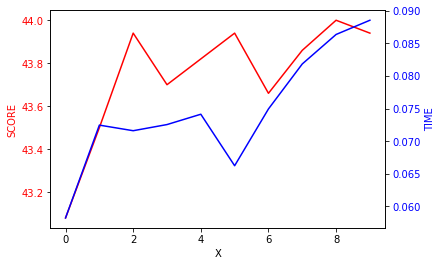

## Overall ###
avg score: 43.744
avg execution time: 0.07468948888778686


In [101]:
statistical_test_function("-method simulated_annealing -tries_in_epoque", 5, "tries in epoque")

## Genetic Algorithm - crossover function

## single_point_crossover functions ###
avg score: 42.68
avg execution time: 0.9743843793869018

## double_point_crossover functions ###
avg score: 42.54
avg execution time: 0.9284525680541992



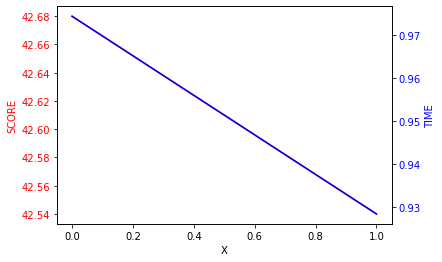

## Overall ###
avg score: 42.61
avg execution time: 0.9514184737205504


In [111]:
statistical_test_function_argument_list("-method genetic_algorithm -iterations 200 -crossover_func",
                                        ["single_point_crossover", "double_point_crossover"], "functions")

## Genetic Algorithm - mutation function

## mutate_single_bit functions ###
avg score: 42.66
avg execution time: 0.9469490003585815

## mutate_scramble functions ###
avg score: 42.56
avg execution time: 0.966128077507019



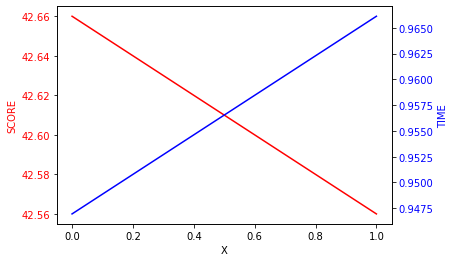

## Overall ###
avg score: 42.61
avg execution time: 0.9565385389328003


In [131]:
statistical_test_function_argument_list("-method genetic_algorithm -iterations 200 -mutation_func",
                                        ["mutate_single_bit", "mutate_scramble"], "functions")

## Genetic Algorithm - terminate condition function

## terminate_score_not_changing functions ###
avg score: 43.94
avg execution time: 0.2479596996307373

## terminate_iterations functions ###
avg score: 44.0
avg execution time: 0.2411652421951294



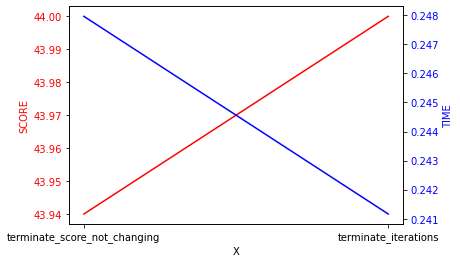

## Overall ###
avg score: 43.97
avg execution time: 0.24456247091293334


In [156]:
statistical_test_function_argument_list("-method genetic_algorithm -iterations 30 -terminate_condition_func",
                                        ["terminate_score_not_changing", "terminate_iterations"], "functions")

## Genetic Algorithm - iterations

## 100 iterations ###
avg score: 42.24
avg execution time: 0.2545414638519287

## 200 iterations ###
avg score: 41.8
avg execution time: 0.47531154155731203

## 300 iterations ###
avg score: 42.02
avg execution time: 0.7409440803527833

## 400 iterations ###
avg score: 42.3
avg execution time: 0.8457495546340943

## 500 iterations ###
avg score: 43.0
avg execution time: 0.7139838457107544

## 600 iterations ###
avg score: 42.62
avg execution time: 0.9764570665359497

## 700 iterations ###
avg score: 43.32
avg execution time: 0.7410124588012695

## 800 iterations ###
avg score: 42.62
avg execution time: 1.4473946189880371

## 900 iterations ###
avg score: 42.64
avg execution time: 1.7720990228652953

## 1000 iterations ###
avg score: 42.58
avg execution time: 1.6578606510162353



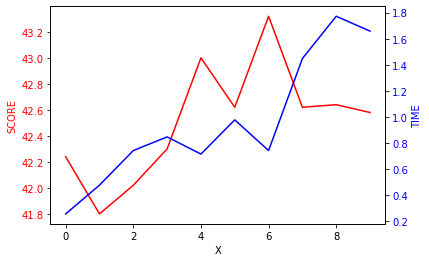

## Overall ###
avg score: 42.513999999999996
avg execution time: 0.962535430431366


In [139]:
statistical_test_function("-method genetic_algorithm -iterations", 100, "iterations")

## Genetic Algorithm - mutation probability

## 10 mutation probability ###
avg score: 43.02
avg execution time: 0.3265989828109741

## 20 mutation probability ###
avg score: 43.06
avg execution time: 0.3758782625198364

## 30 mutation probability ###
avg score: 43.12
avg execution time: 0.38236141681671143

## 40 mutation probability ###
avg score: 43.56
avg execution time: 0.2559870338439941

## 50 mutation probability ###
avg score: 43.92
avg execution time: 0.19063714504241944

## 60 mutation probability ###
avg score: 44.0
avg execution time: 0.20538701057434083

## 70 mutation probability ###
avg score: 44.0
avg execution time: 0.18137107372283937

## 80 mutation probability ###
avg score: 44.0
avg execution time: 0.23125437259674073

## 90 mutation probability ###
avg score: 44.0
avg execution time: 0.2976168155670166

## 100 mutation probability ###
avg score: 44.0
avg execution time: 0.3527197742462158



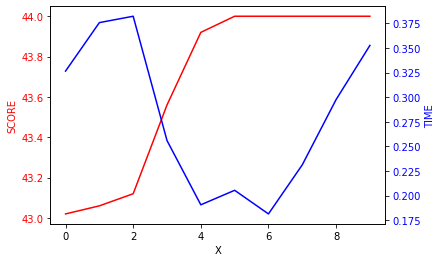

## Overall ###
avg score: 43.668
avg execution time: 0.2799811887741089


In [142]:
statistical_test_function("-method genetic_algorithm -iterations 200 -mutation_func mutate_scramble -mutation_p", 10,
                          "mutation probability")

## Genetic Algorithm - population size

## 50 population size ###
avg score: 40.8
avg execution time: 0.3253601884841919

## 100 population size ###
avg score: 42.64
avg execution time: 0.4124399948120117

## 150 population size ###
avg score: 43.28
avg execution time: 0.38210870742797853

## 200 population size ###
avg score: 43.36
avg execution time: 0.42091968059539797

## 250 population size ###
avg score: 43.76
avg execution time: 0.2769705104827881

## 300 population size ###
avg score: 43.86
avg execution time: 0.26216421127319334

## 350 population size ###
avg score: 43.94
avg execution time: 0.2316914653778076

## 400 population size ###
avg score: 43.88
avg execution time: 0.3089462757110596

## 450 population size ###
avg score: 43.94
avg execution time: 0.2797644090652466

## 500 population size ###
avg score: 44.0
avg execution time: 0.2266306734085083



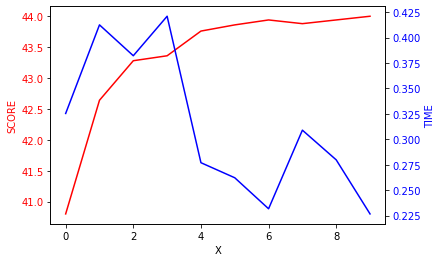

## Overall ###
avg score: 43.346
avg execution time: 0.3126996116638183


In [144]:
statistical_test_function("-method genetic_algorithm -iterations 200 -pop_size", 50, "population size")

## Island Genetic Algorithm - iterations

## 10 iterations ###
avg score: 43.7
avg execution time: 0.9505301094055176

## 20 iterations ###
avg score: 44.0
avg execution time: 0.91390465259552

## 30 iterations ###
avg score: 44.0
avg execution time: 0.8608423662185669

## 40 iterations ###
avg score: 44.0
avg execution time: 0.8268052673339844

## 50 iterations ###
avg score: 44.0
avg execution time: 0.8752413654327392

## 60 iterations ###
avg score: 44.0
avg execution time: 0.9479162073135377

## 70 iterations ###
avg score: 44.0
avg execution time: 0.8918792057037354

## 80 iterations ###
avg score: 44.0
avg execution time: 0.8866794586181641

## 90 iterations ###
avg score: 44.0
avg execution time: 0.8419119691848755

## 100 iterations ###
avg score: 44.0
avg execution time: 0.9366118288040162



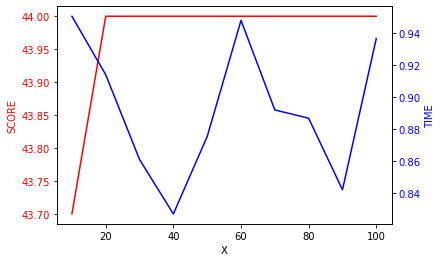

## Overall ###
avg score: 43.97
avg execution time: 0.8932322430610657


In [158]:
statistical_test_function("-method island_genetic_algorithm -iterations", 10, "iterations")

## Island Genetic Algorithm - islands count

## 1 islands count ###
avg score: 42.54
avg execution time: 0.2531449747085571

## 2 islands count ###
avg score: 43.62
avg execution time: 0.2393009328842163

## 3 islands count ###
avg score: 43.74
avg execution time: 0.26796663761138917

## 4 islands count ###
avg score: 44.0
avg execution time: 0.22041739463806154

## 5 islands count ###
avg score: 44.0
avg execution time: 0.256788067817688

## 6 islands count ###
avg score: 44.0
avg execution time: 0.28925910472869876

## 7 islands count ###
avg score: 44.0
avg execution time: 0.3379057884216309

## 8 islands count ###
avg score: 44.0
avg execution time: 0.40652119159698485

## 9 islands count ###
avg score: 44.0
avg execution time: 0.4559085559844971

## 10 islands count ###
avg score: 44.0
avg execution time: 0.4555810356140137



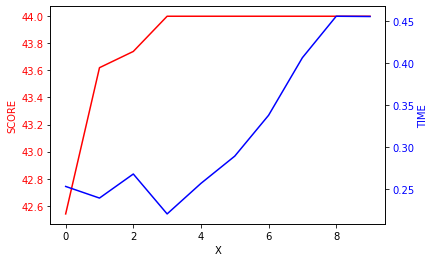

## Overall ###
avg score: 43.79
avg execution time: 0.3182793684005737


In [146]:
statistical_test_function("-method island_genetic_algorithm -iterations 100 -islands_count", 1, "islands count")

## Island Genetic Algorithm - migration speed

## 2 migration speed ###
avg score: 43.94
avg execution time: 0.28558361530303955

## 4 migration speed ###
avg score: 44.0
avg execution time: 0.2635287857055664

## 6 migration speed ###
avg score: 44.0
avg execution time: 0.2558870792388916

## 8 migration speed ###
avg score: 44.0
avg execution time: 0.2639131450653076

## 10 migration speed ###
avg score: 43.94
avg execution time: 0.2886565399169922

## 12 migration speed ###
avg score: 44.0
avg execution time: 0.2530345296859741

## 14 migration speed ###
avg score: 44.0
avg execution time: 0.2581441354751587

## 16 migration speed ###
avg score: 43.94
avg execution time: 0.28887253284454345

## 18 migration speed ###
avg score: 44.0
avg execution time: 0.2523160457611084

## 20 migration speed ###
avg score: 43.94
avg execution time: 0.2793510913848877



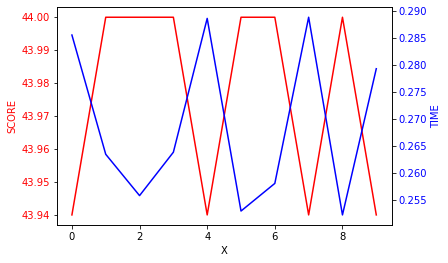

## Overall ###
avg score: 43.976
avg execution time: 0.268928750038147


In [147]:
statistical_test_function("-method island_genetic_algorithm -iterations 100 -migration_speed", 2, "migration speed")

## Island Genetic Algorithm - migration pause

## 2 migration pause ###
avg score: 43.94
avg execution time: 0.29271684646606444

## 4 migration pause ###
avg score: 44.0
avg execution time: 0.25499586582183836

## 6 migration pause ###
avg score: 43.94
avg execution time: 0.35402095794677735

## 8 migration pause ###
avg score: 44.0
avg execution time: 0.2619412326812744

## 10 migration pause ###
avg score: 44.0
avg execution time: 0.270332555770874

## 12 migration pause ###
avg score: 44.0
avg execution time: 0.2803755140304565

## 14 migration pause ###
avg score: 44.0
avg execution time: 0.36114734649658203

## 16 migration pause ###
avg score: 43.94
avg execution time: 0.3222615098953247

## 18 migration pause ###
avg score: 44.0
avg execution time: 0.28313278675079345

## 20 migration pause ###
avg score: 44.0
avg execution time: 0.2824362182617188



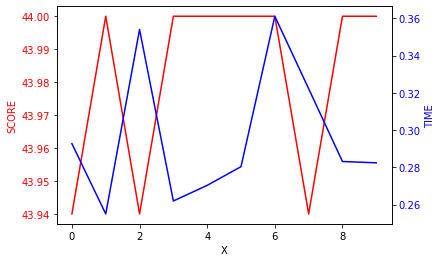

## Overall ###
avg score: 43.982
avg execution time: 0.2963360834121704


In [148]:
statistical_test_function("-method island_genetic_algorithm -iterations 100 -migration_pause", 2, "migration pause")

# All algorithms with best params

## hillclimb_deterministic ###
Hits ratio: 3.5000000000000004%
Avg score: 37.015
Avg execution time: 0.03643081307411194



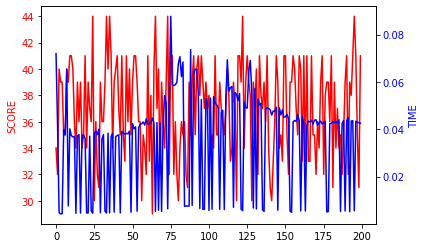

## hillclimb_stochastic ###
Hits ratio: 1.5%
Avg score: 34.935
Avg execution time: 0.0639741837978363



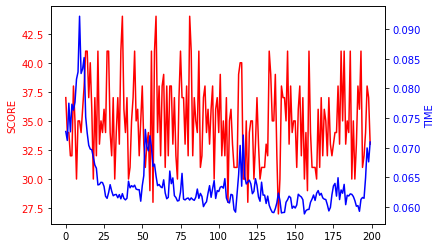

## Tabu ###
Hits ratio: 10.0%
Avg score: 35.435
Avg execution time: 0.08331191897392273



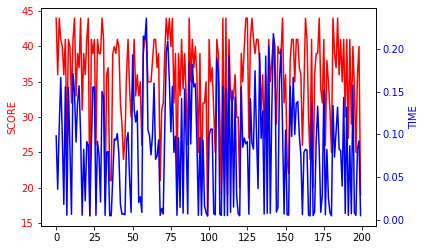

## simulated_annealing ###
Hits ratio: 93.5%
Avg score: 43.75
Avg execution time: 0.030292155742645262



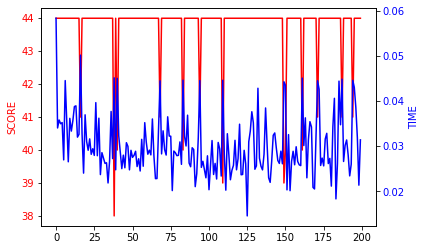

## genetic_algorithm ###
Hits ratio: 99.0%
Avg score: 43.97
Avg execution time: 0.26716036438941954



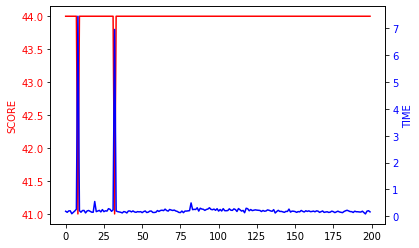

## island_genetic_algorithm ###
Hits ratio: 100.0%
Avg score: 44.0
Avg execution time: 0.6339945459365844



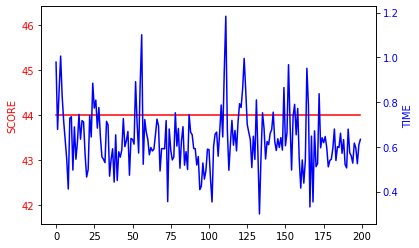

In [203]:
run_algorithm_in_loop("-method hillclimb_deterministic", 200, "hillclimb_deterministic")
run_algorithm_in_loop("-method hillclimb_stochastic", 200, "hillclimb_stochastic")
run_algorithm_in_loop("-method tabu", 200, "Tabu")
run_algorithm_in_loop("-method simulated_annealing", 200, "simulated_annealing")
run_algorithm_in_loop("-method genetic_algorithm", 200, "genetic_algorithm")
run_algorithm_in_loop("-method island_genetic_algorithm -iterations 100", 200, "island_genetic_algorithm")